In [1]:
#https://cloud.google.com/community/tutorials/bigquery-ibis
!pip install --upgrade "git+https://github.com/ibis-project/ibis.git#egg=ibis_framework[bigquery]"

  Cloning https://github.com/ibis-project/ibis.git to /tmp/pip-install-zng6mcud/ibis-framework
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for ibis-framework: filename=ibis_framework-1.4.0+109.gd0202496-py3-none-any.whl size=705382 sha256=b0618c5016a909181d58d2a8e98118d08bc9d70b69838ee2ba0960bb5ca0507a
  Stored in directory: /tmp/pip-ephem-wheel-cache-r8u2e_y_/wheels/fe/da/40/ef5079d77d596056e47cdc669bff7eba2e32b9adaa8ae8e69c
Successfully built ibis-framework
  Attempting uninstall: ibis-framework
    Found existing installation: ibis-framework 1.4.0+109.gd0202496
    Uninstalling ibis-framework-1.4.0+109.gd0202496:
      Successfully uninstalled ibis-framework-1.4.0+109.gd0202496


In [2]:
#https://googleapis.dev/python/bigquery/latest/index.html
import ibis
import os
import pandas

from google.cloud import bigquery

CREDENTIAL = "./gcp-credential.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = f'{CREDENTIAL}'

"""This way doesn't work - just use separate JSON and call it instead of putting into .env
credentials = service_account.Credentials.from_service_account_file(
    f"{CREDENTIAL}", scopes = ["https://www.googleapis.com/auth/cloud-platform"]
)
"""
client = bigquery.Client()

# Do we have to authenticate our credentials first?

# Use ibis to construct SQL query
conn = ibis.bigquery.connect(
    project_id = 'ita-datalakepoc',
    dataset_id = 'publicwork_311'
)

""" OR, this also works
conn = ibis.bigquery.connect(
    dataset_id='ita-datalakepoc.publicwork_311')
"""

table = conn.table('ServiceRequestTopLevel')

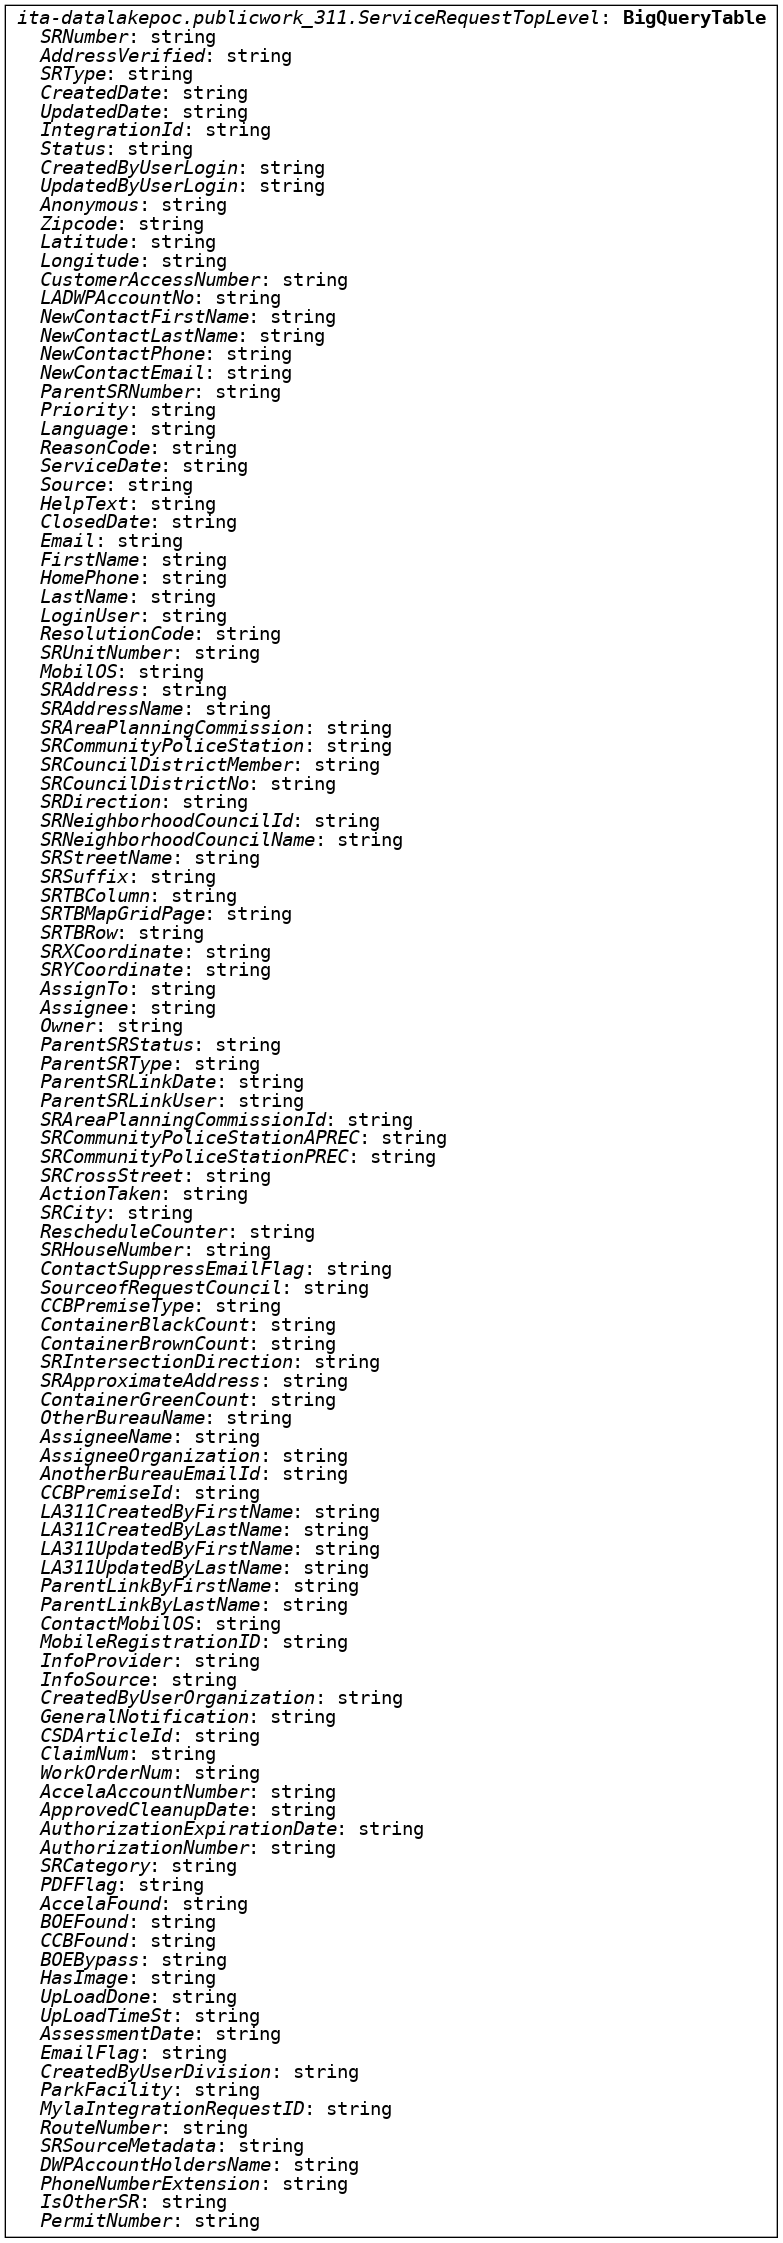

In [3]:
table

In [9]:
keep_cols = ["SRNumber", "SRType", "CreatedDate", "Longitude", "Latitude"]
expr = table[keep_cols]#.mutate(CreatedDate = table.CreatedDate.cast("date"))
#expr = expr[expr.CreatedDate.cast("date")]

#expr3 = expr2[expr2.CreatedDate > (ibis.now() - ibis.interval(months=1))]

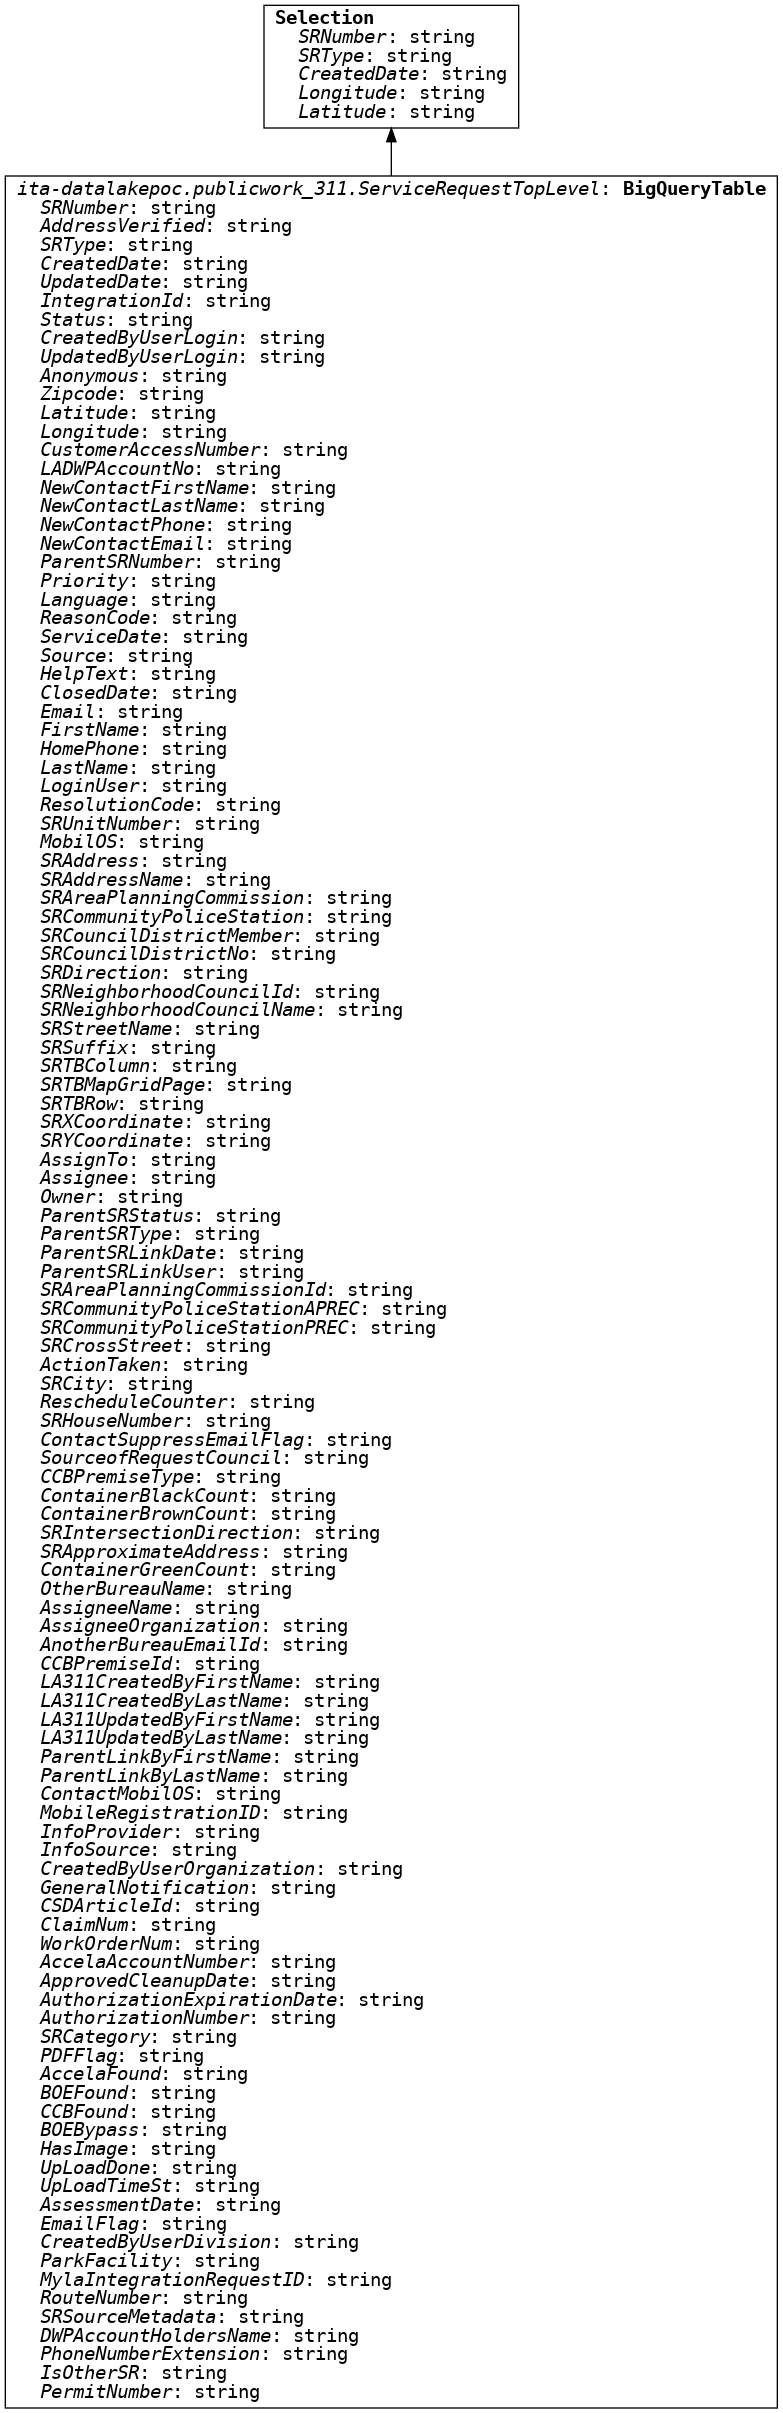

In [10]:
expr

In [11]:
# Compile shows the SQL statement
print(ibis.bigquery.compile(expr.limit(20)))

SELECT `SRNumber`, `SRType`, `CreatedDate`, `Longitude`, `Latitude`
FROM `ita-datalakepoc.publicwork_311.ServiceRequestTopLevel`
LIMIT 20


In [12]:
print(expr.execute())

PermissionDenied: 403 request failed: the user does not have 'bigquery.readsessions.create' permission for 'projects/ita-datalakepoc'

In [13]:
expr.execute()

PermissionDenied: 403 request failed: the user does not have 'bigquery.readsessions.create' permission for 'projects/ita-datalakepoc'

In [ ]:
'''
def prep_311_data(expr):

    # Grab last 6 month's worth of data
    filtered_expr = expr[(expr.SRType != "Homeless Encampment")]

    keep_cols = ["SRNumber", "SRType", "CreatedDate", "Longitude", "Latitude"]

    filtered_expr = filtered_expr[keep_cols]
    
    #(expr.CreatedDate.cast("date") > (ibis.now() - ibis.interval(months=1)))
    
    df = filtered_expr.execute()

    return df

df = prep_311_data(expr)
'''

In [ ]:
# Try the SQL statement instead?
QUERY = (
    """
    SELECT `SRNumber`, `SRType`, CAST(`CreatedDate` AS DATE) AS `CreatedDate`,
       `Longitude`, `Latitude`
    FROM `ita-datalakepoc.publicwork_311.ServiceRequestTopLevel`
    LIMIT 20
    """
)

query_job = client.query(QUERY)
df = query_job.to_dataframe()
df.head()
